In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# from carps.analysis.process_data import get_interpolated_performance_df, load_logs, process_logs
import importlib
import carps
import carps.analysis
import carps.analysis.gather_data
importlib.reload(carps)
importlib.reload(carps.analysis.gather_data)
from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df, load_logs, process_logs, load_set


def print_overview(df_trials: pd.DataFrame) -> None:
    print(df_trials.columns)
    print(df_trials["optimizer_id"].unique())
    print(df_trials["benchmark_id"].unique())
    print(df_trials["problem_id"].unique())
    print(df_trials["scenario"].unique())
    print("Number of seeds", df_trials["seed"].nunique())


# rundir = "../runs"
# df, df_cfg = load_logs(rundir=rundir)
# df = pd.read_csv("../logs_combined.csv")
# df_cfg = pd.read_csv("../logs_combined_cfg.csv")

paths = {
    "BBfull": {
        "full": [
        "../runs/SMAC3-BlackBoxFacade",
        "../runs/RandomSearch",
        "../runs/Nevergrad-CMA-ES",
    ]},
    "MOfull": {
        "full": ["../runs_MO"]
    },
    "BBsubset": {
        "dev": ["../runs_subset_BB/dev"],
        "test": ["../runs_subset_BB/test"],
    },
    "MFsubset": {
        "dev": ["../runs_subset_MF/dev"],
        "test": ["../runs_subset_MF/test"],
    },
    "MOsubset": {
        "dev": ["../runs_subset_MO/dev"],
        "test": ["../runs_subset_MO/test"],
    },
    "MOMFsubset": {
        "dev": ["../runs_subset_MOMF/dev"],
        "test": ["../runs_subset_MOMF/test"],
    },
}
subset = "BBsubset"
problem_prefix = "blackbox/30"

# subset = "MFsubset"
# problem_prefix = "multifidelity/20"

# subset = "MOsubset"
# problem_prefix = "multiobjective/10"

# subset = "MOMFsubset"
# problem_prefix = "momf/9"



loaded = [load_set(paths=ps, set_id=set_id) for set_id, ps in paths[subset].items()]
df = pd.concat([d for d, _ in loaded]).reset_index(drop=True)
df_cfg = pd.concat([d for _, d in loaded]).reset_index(drop=True)


print(df.columns)
df = normalize_logs(df)
print_overview(df)
perf = get_interpolated_performance_df(df)
perf_time = get_interpolated_performance_df(df, x_column="time_norm")


Index(['n_trials', 'n_function_calls', 'trial_info__config',
       'trial_info__instance', 'trial_info__seed', 'trial_info__budget',
       'trial_info__normalized_budget', 'trial_info__name',
       'trial_info__checkpoint', 'trial_value__cost', 'trial_value__time',
       'trial_value__virtual_time', 'trial_value__status',
       'trial_value__starttime', 'trial_value__endtime', 'seed',
       'benchmark_id', 'problem_id', 'optimizer_id', 'problem.model_id',
       'problem.dataset_id', 'problem.surrogates_dir', 'trial_value__cost_raw',
       'trial_value__cost_inc', 'scenario', 'time', 'problem.model',
       'problem.task_id', 'problem.budget_type', 'problem.seed',
       'problem.bench', 'problem.instance', 'problem.metric',
       'problem.dimension', 'problem.fid', 'experiment_id', 'set'],
      dtype='object')


[15:13:10] INFO     Start normalization...                                                       ]8;id=169864;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=944583;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#357\357]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=800423;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=665185;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#358\358]8;;\

           INFO     Normalize cost...                                                            ]8;id=297197;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=105114;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#360\360]8;;\

[15:13:11] INFO     Calc normalized incumbent cost...                                            ]8;id=944021;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=750987;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#369\369]8;;\

           INFO     Normalize time...                                                            ]8;id=509526;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=305436;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#375\375]8;;\

[15:13:13] INFO     Done.                                                                        ]8;id=930948;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=512535;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#378\378]8;;\

Index(['n_trials', 'n_function_calls', 'trial_info__config',
       'trial_info__instance', 'trial_info__seed', 'trial_info__budget',
       'trial_info__normalized_budget', 'trial_info__name',
       'trial_info__checkpoint', 'trial_value__cost', 'trial_value__time',
       'trial_value__virtual_time', 'trial_value__status',
       'trial_value__starttime', 'trial_value__endtime', 'seed',
       'benchmark_id', 'problem_id', 'optimizer_id', 'problem.model_id',
       'problem.dataset_id', 'problem.surrogates_dir', 'trial_value__cost_raw',
       'trial_value__cost_inc', 'scenario', 'time', 'problem.model',
       'problem.task_id', 'problem.budget_type', 'problem.seed',
       'problem.bench', 'problem.instance', 'problem.metric',
       'problem.dimension', 'problem.fid', 'experiment_id', 'set',
       'n_trials_norm', 'trial_value__cost_norm', 'trial_value__cost_inc_norm',
       'time_norm'],
      dtype='object')
['Optuna' 'Nevergrad-CMA-ES' 'SMAC3-BlackBoxFacade' 'RandomSearch'
 

[15:13:14] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=428991;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=426729;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#432\432]8;;\
                    budget.                                                                                        

[15:13:18] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=339527;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=284993;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#432\432]8;;\
                    budget.                                                                                        

In [2]:
# Calculate time
from carps.analysis.utils import filter_only_final_performance
df_final = filter_only_final_performance(df=df)
print("Runtime", subset, df_final["time"].sum() / 60 / 60)

Runtime BBsubset 39438.634436319604


----------------------------------------------------------------------------------------------------
('blackbox', 'dev')


[15:13:29] INFO     Lost following experiments: Empty DataFrame                                 ]8;id=193486;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=265479;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#113\113]8;;\
                    Columns: [HEBO, Nevergrad-CMA-ES, Optuna, RandomSearch,                                        
                    SMAC3-BlackBoxFacade, SMAC3-HPOFacade, Scikit_Optimize, SyneTune-BO]                           
                    Index: []                                                                                      

Rejecting null hypothesis that data is normal for column HEBO (p=0.000656<0.006250)
Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000642<0.006250)
Rejecting null hypothesis that data is normal for column Optuna (p=0.002417<0.006250)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000871<0.006250)
Fail to reject null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.011027>=0.006250)
Rejecting null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.002992<0.006250)
Rejecting null hypothesis that data is normal for column Scikit_Optimize (p=0.001113<0.006250)
Rejecting null hypothesis that data is normal for column SyneTune-BO (p=0.000307<0.006250)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical d

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:233: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)],
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:241: FutureWarning: Series.__getitem__ treating ke

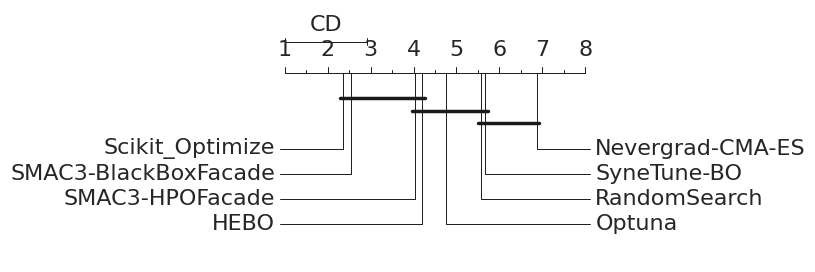

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


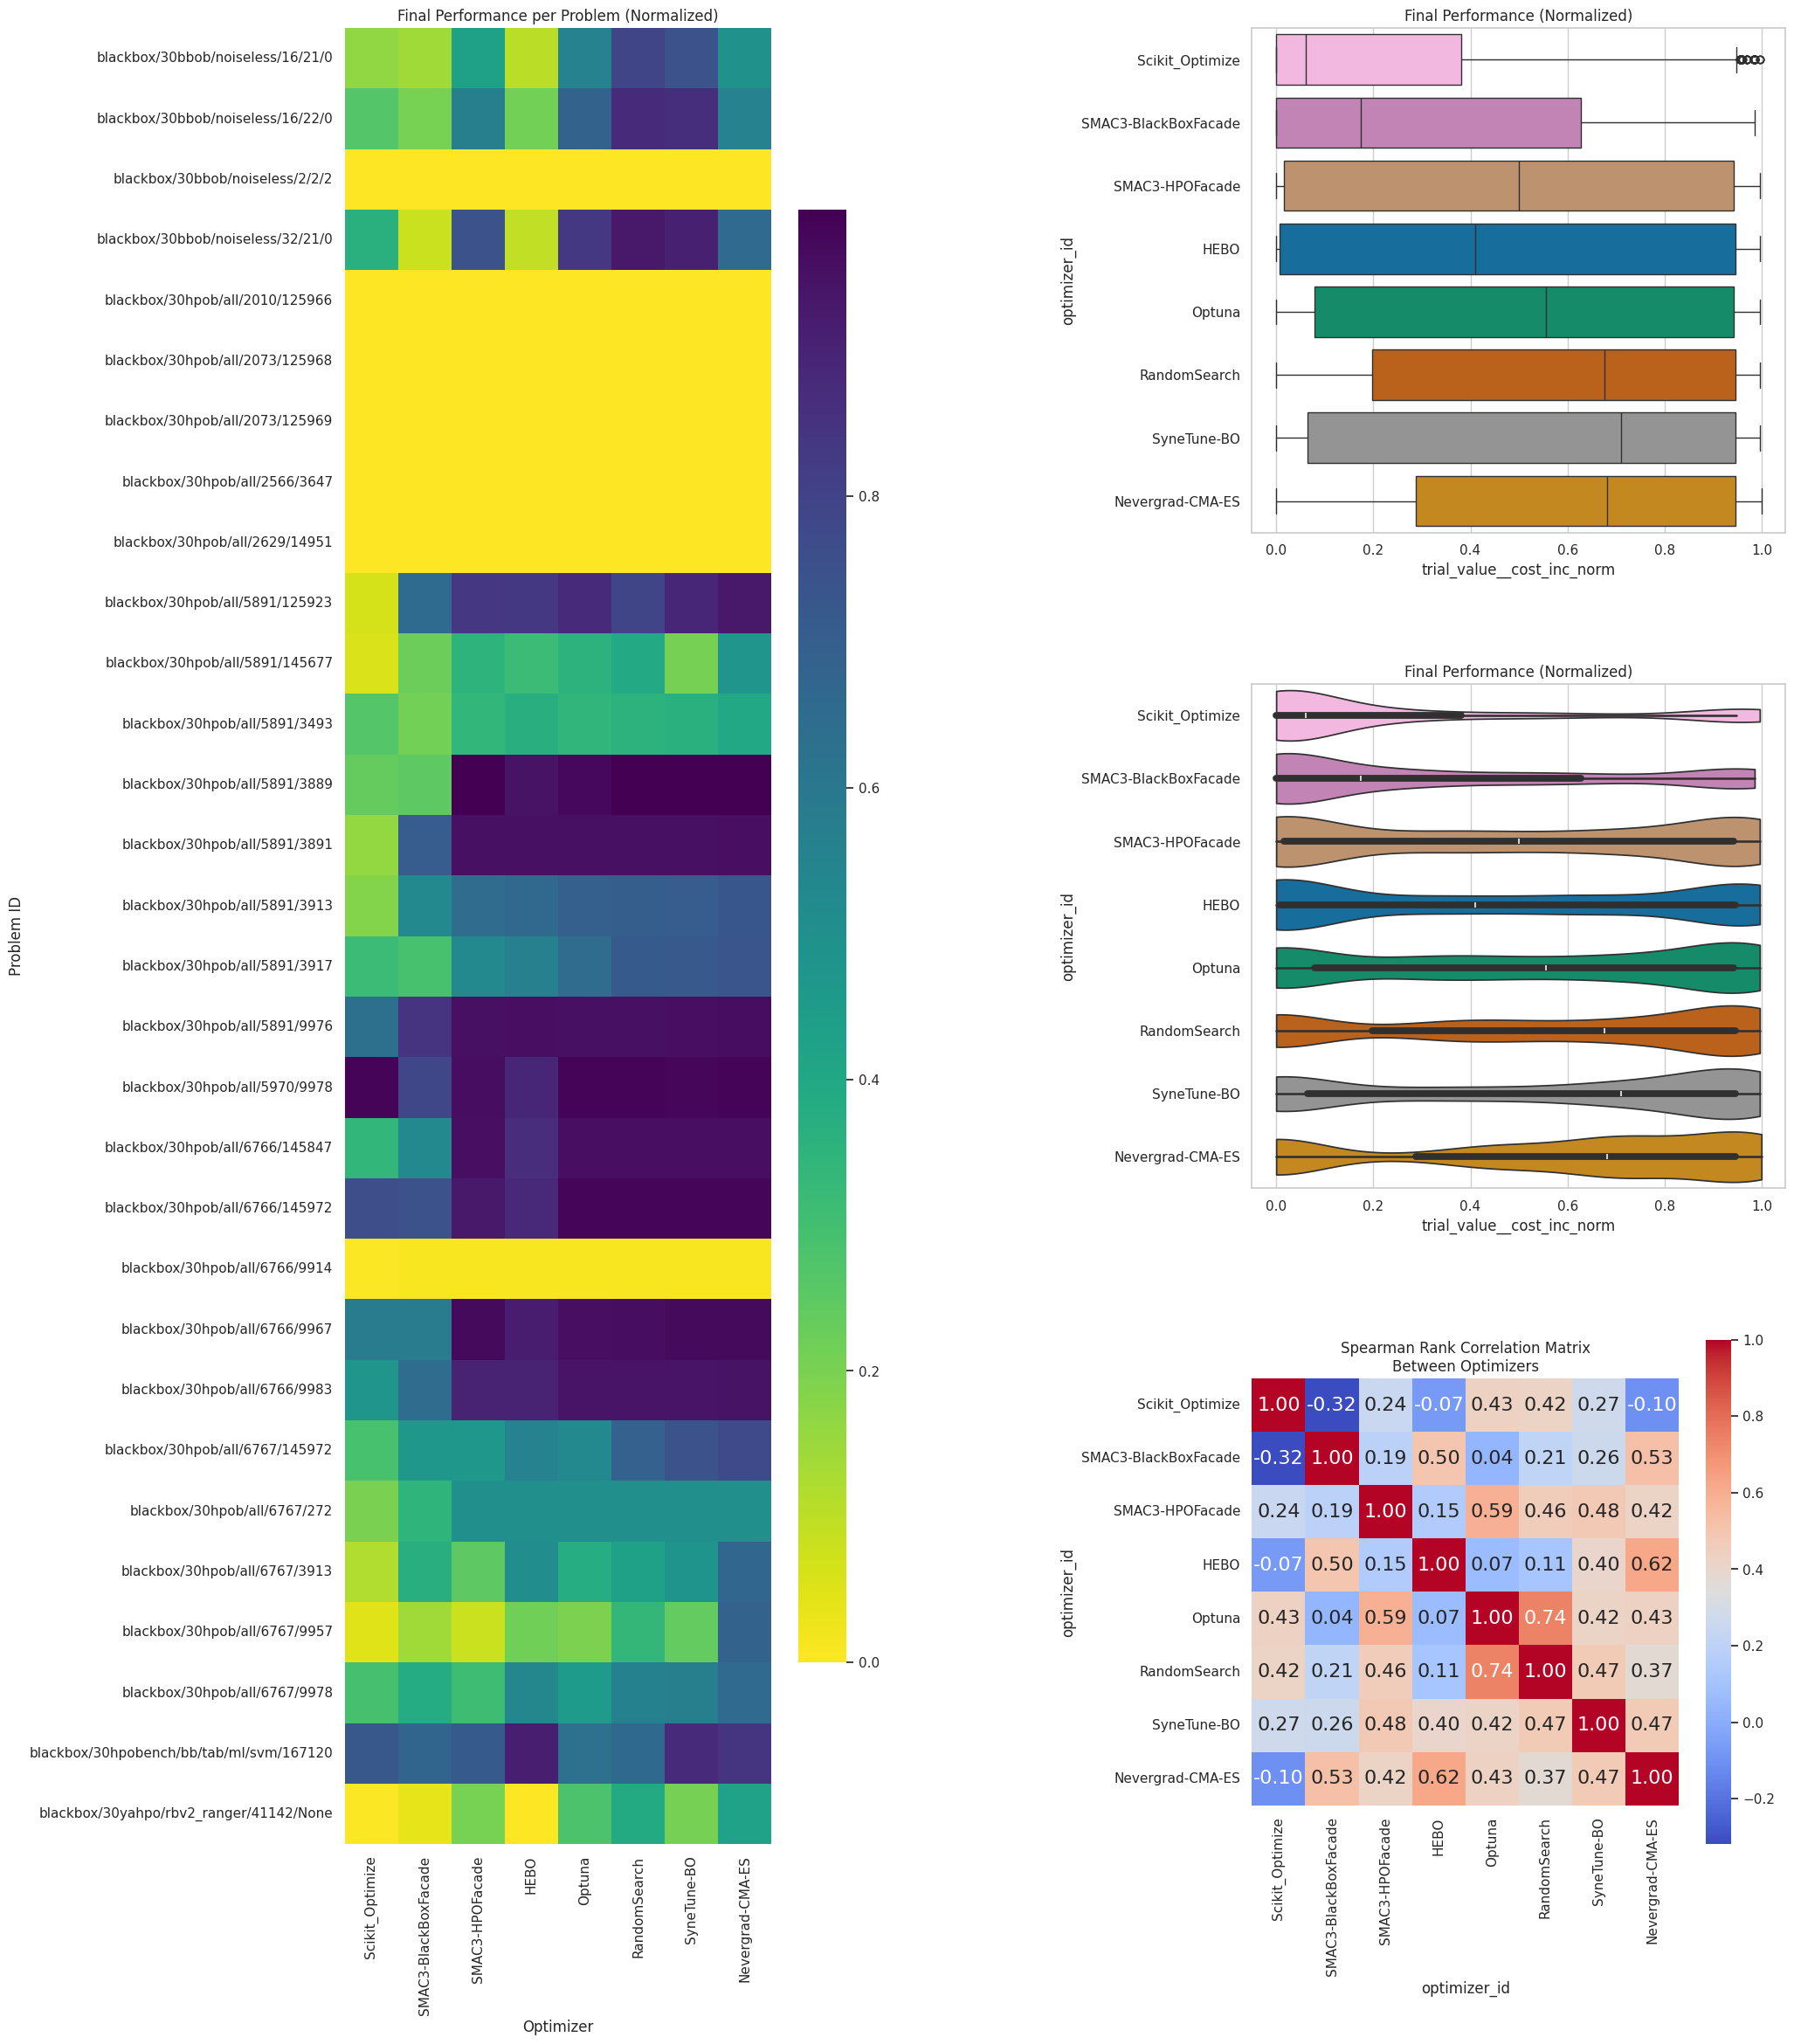

----------------------------------------------------------------------------------------------------
('blackbox', 'test')


[15:13:42] INFO     Lost following experiments: Empty DataFrame                                 ]8;id=165294;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=828538;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#113\113]8;;\
                    Columns: [HEBO, Nevergrad-CMA-ES, Optuna, RandomSearch,                                        
                    SMAC3-BlackBoxFacade, SMAC3-HPOFacade, Scikit_Optimize, SyneTune-BO]                           
                    Index: []                                                                                      

Rejecting null hypothesis that data is normal for column HEBO (p=0.000524<0.006250)
Rejecting null hypothesis that data is normal for column Nevergrad-CMA-ES (p=0.000090<0.006250)
Rejecting null hypothesis that data is normal for column Optuna (p=0.000363<0.006250)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000067<0.006250)
Rejecting null hypothesis that data is normal for column SMAC3-BlackBoxFacade (p=0.002216<0.006250)
Rejecting null hypothesis that data is normal for column SMAC3-HPOFacade (p=0.001180<0.006250)
Rejecting null hypothesis that data is normal for column Scikit_Optimize (p=0.000186<0.006250)
Rejecting null hypothesis that data is normal for column SyneTune-BO (p=0.000124<0.006250)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distanc

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:233: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)],
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:241: FutureWarning: Series.__getitem__ treating ke

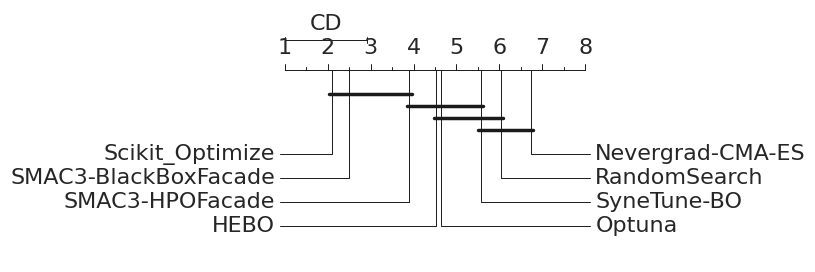

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


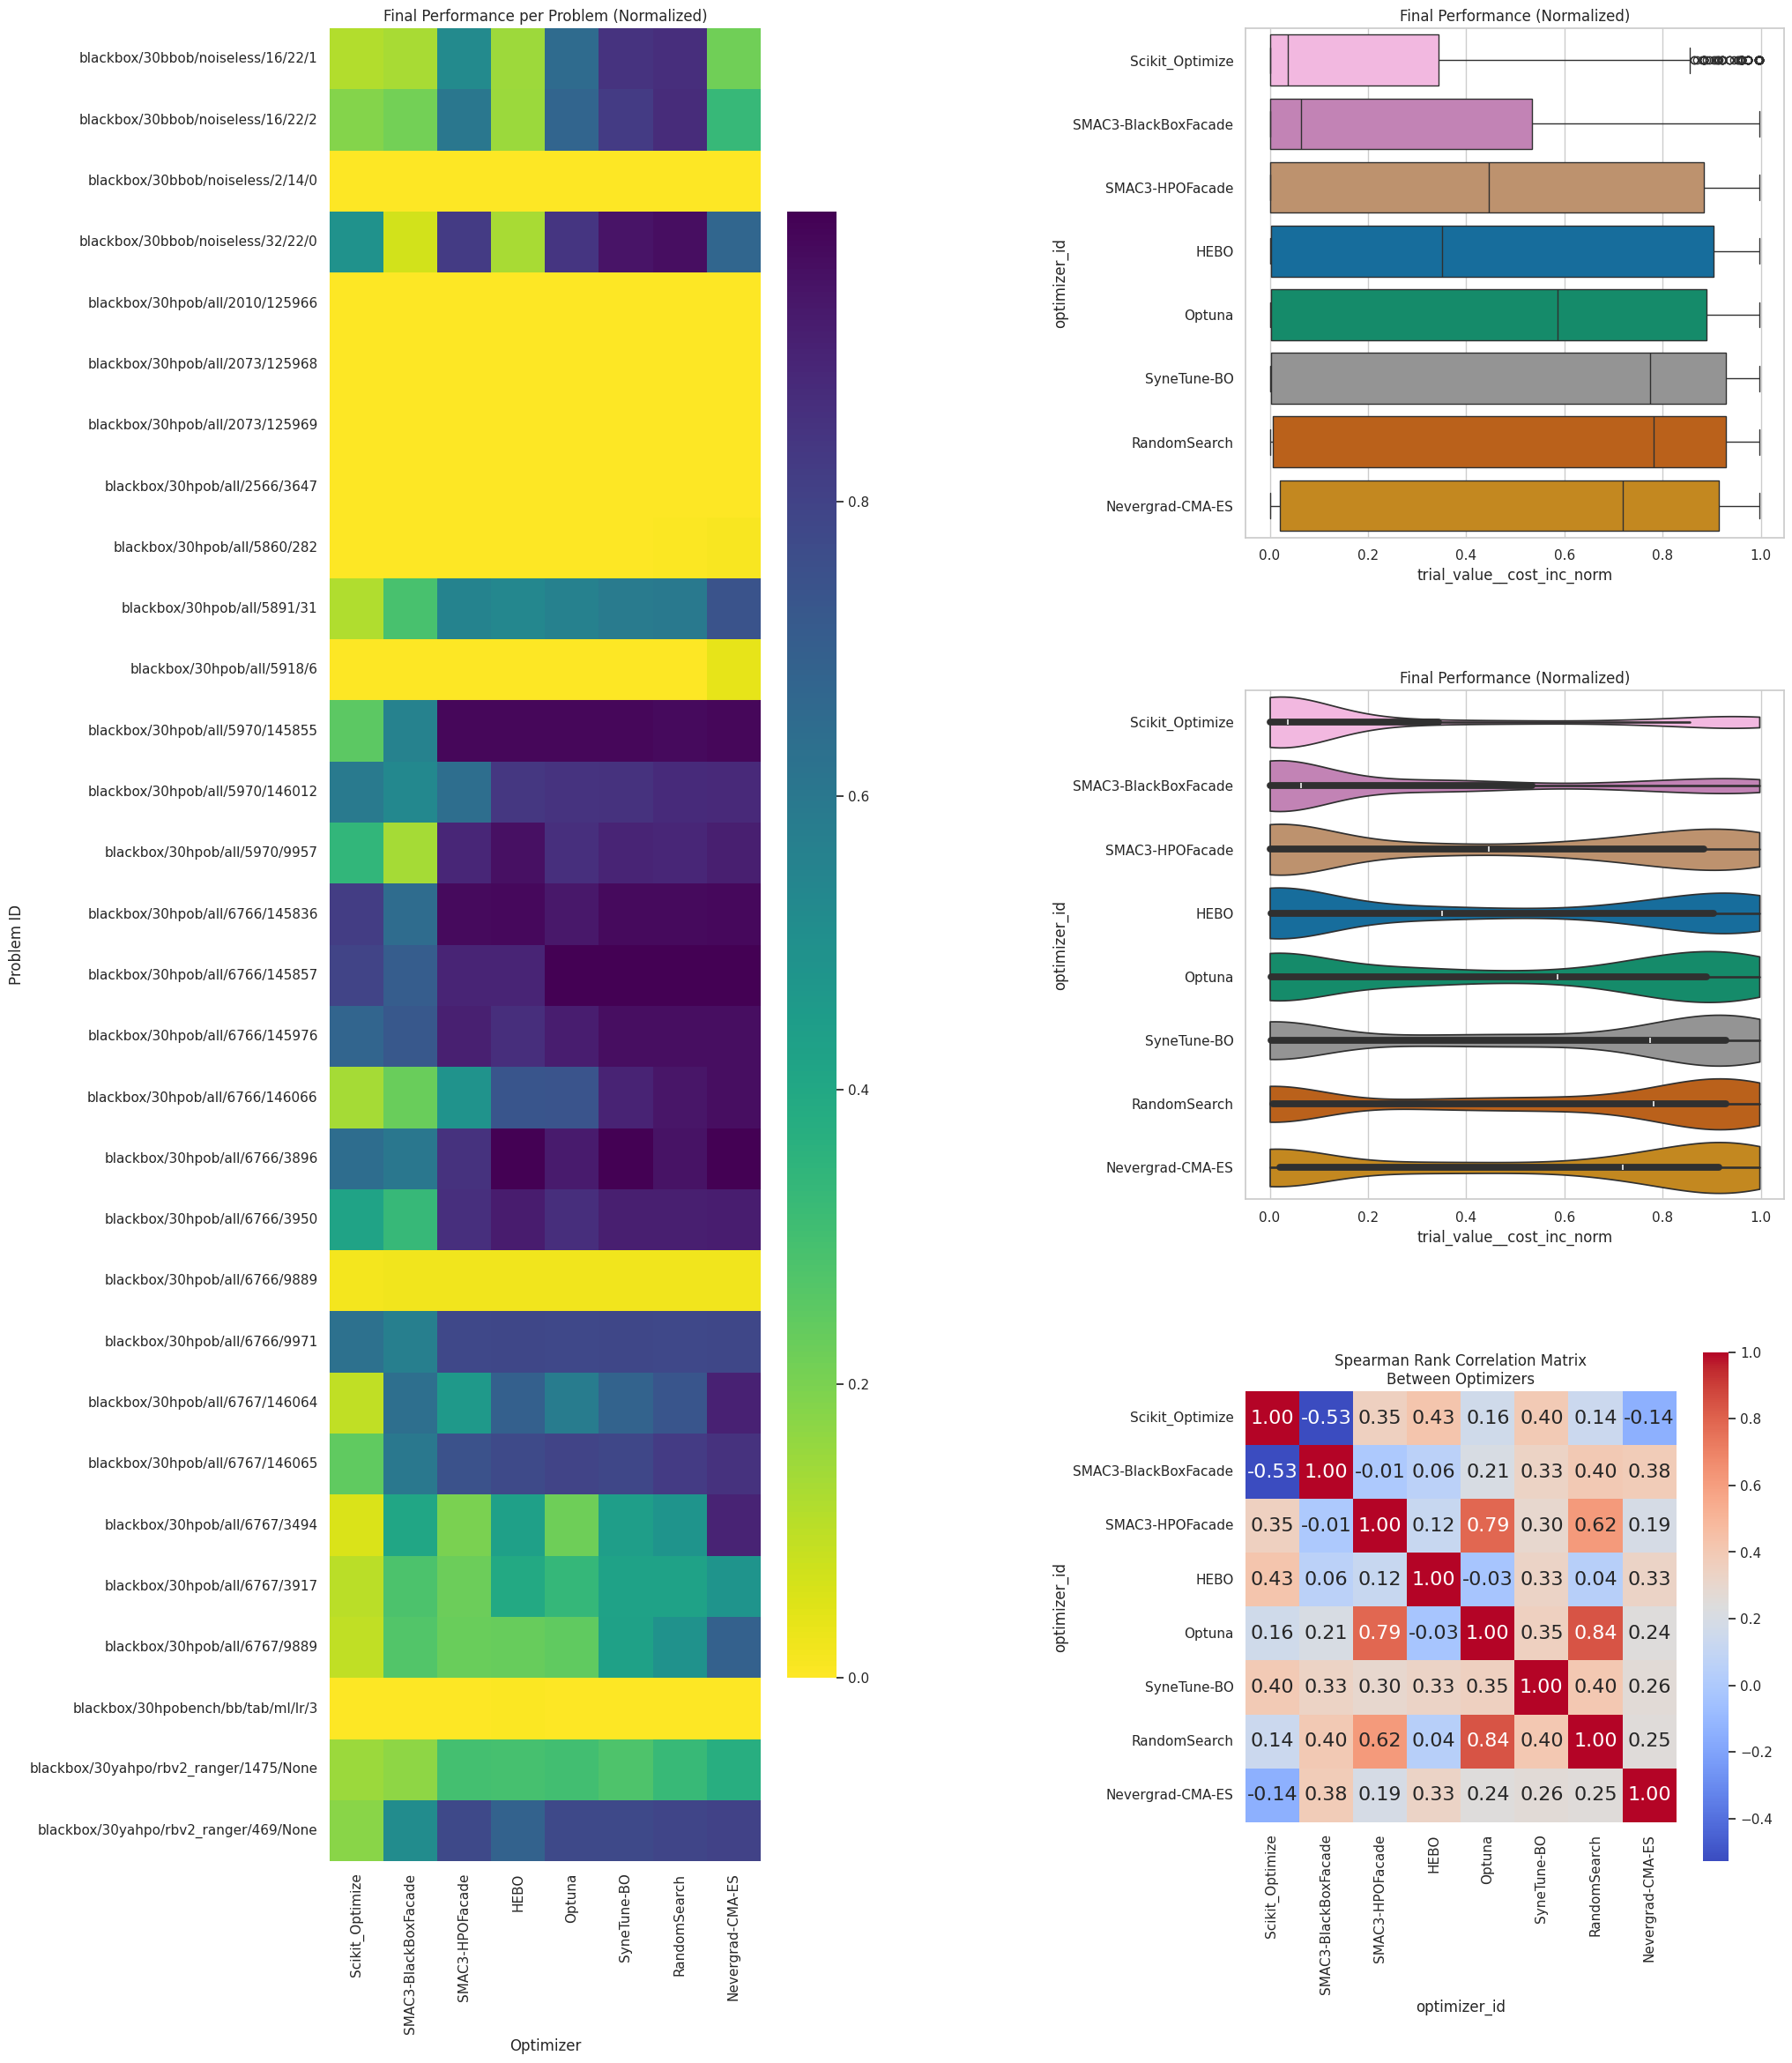

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from carps.analysis.utils import setup_seaborn
import seaborn as sns
import importlib
import carps
import carps.analysis
import carps.analysis.plot_ranking
importlib.reload(carps)
importlib.reload(carps.analysis)
importlib.reload(carps.analysis.plot_ranking)
from carps.analysis.plot_ranking import plot_ranking

setup_seaborn(font_scale=1)

for gid, gdf in df.groupby(by=["scenario", "set"]):    
    print("-"*100)
    print(gid)
    scenario, set_id = gid
    perf_col = "trial_value__cost_inc_norm"
    if len(gdf) > 0:
        plot_ranking(gdf=gdf, scenario=scenario, set_id=set_id, perf_col=perf_col)


In [4]:

# fig, axes = plot_interval_estimates(performance_data=perf, load_from_pickle=False, figure_filename="figures/plot_interval_estimates.pdf")

('blackbox', 'dev')


('blackbox', 'test')
plot over time
('blackbox', 'dev')
('blackbox', 'test')


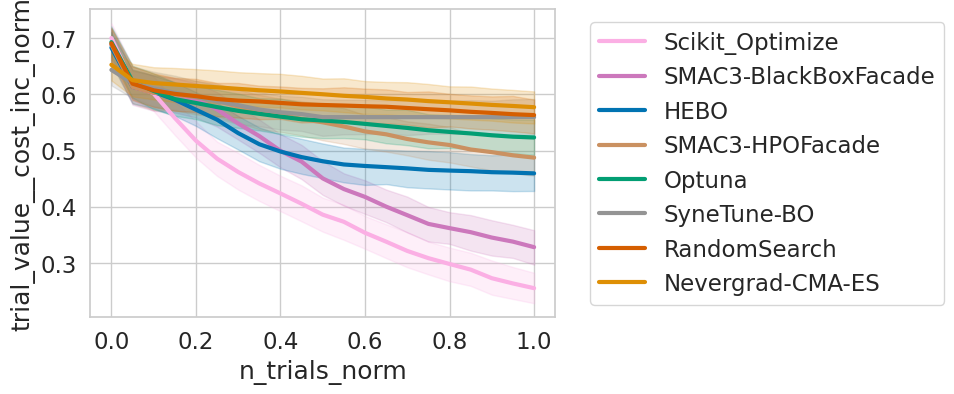

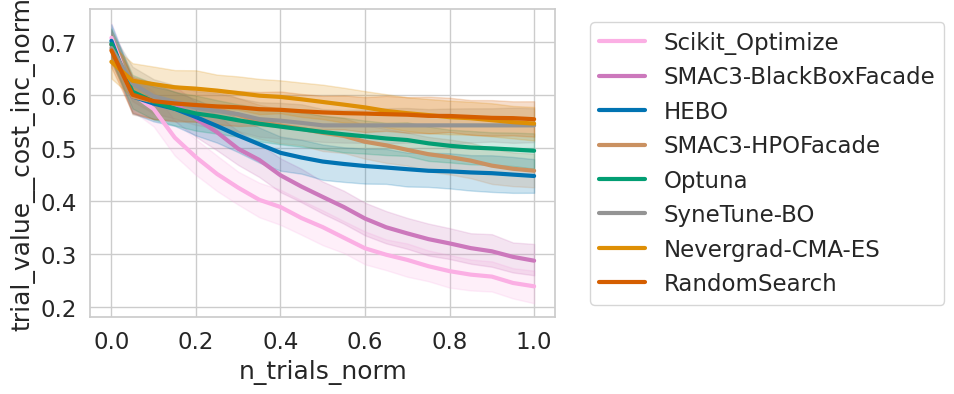

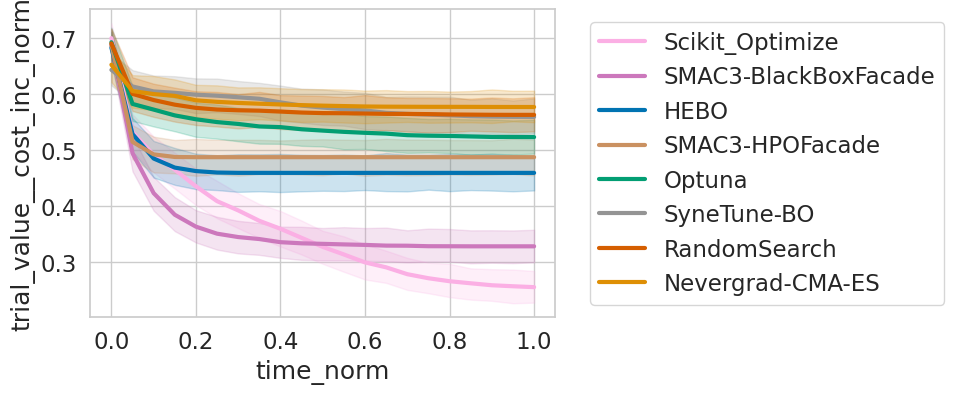

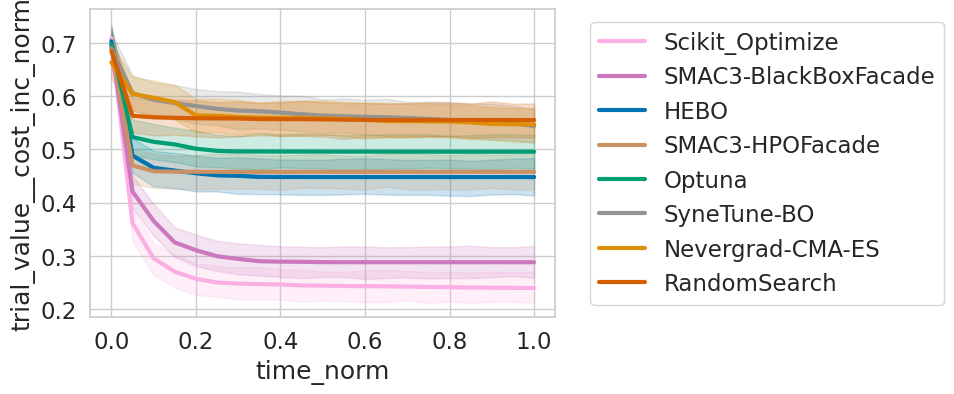

In [5]:
from carps.analysis.performance_over_time import plot_performance_over_time, setup_seaborn, savefig, get_color_palette
import seaborn as sns
import matplotlib
lineplot_kwargs = dict(linewidth=3)
for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="n_trials_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_trials.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )
print("plot over time")
for gid, gdf in perf_time.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="time_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_elapsed.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )

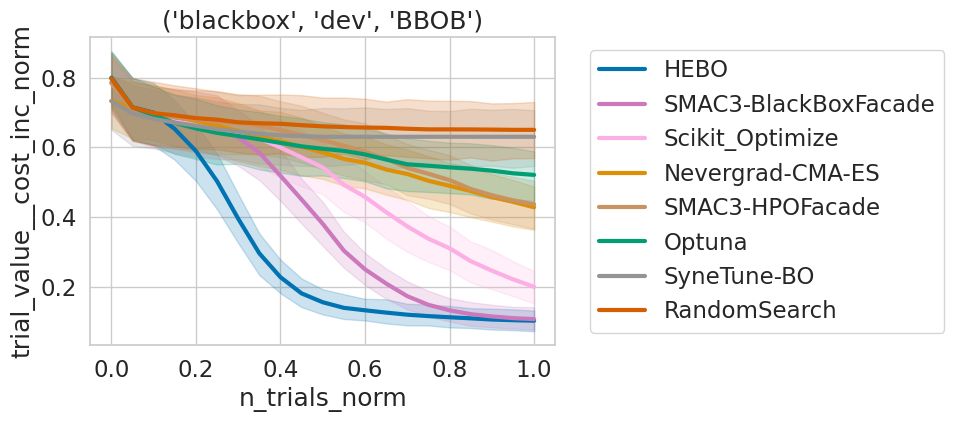

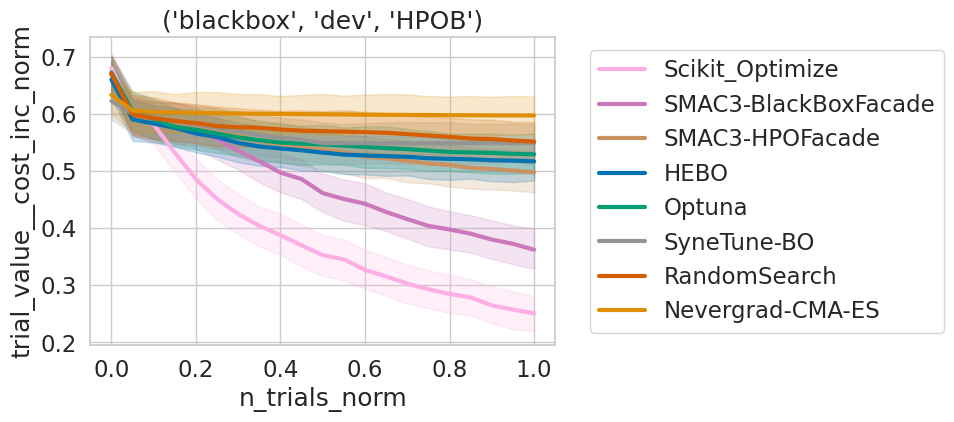

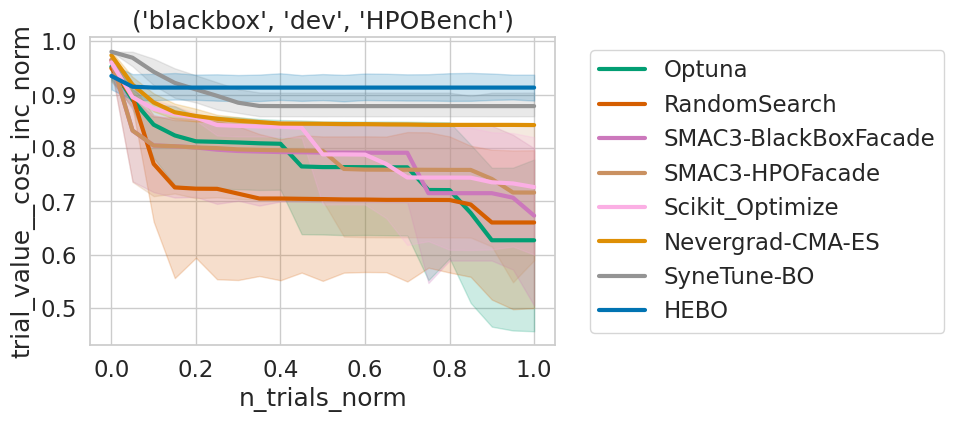

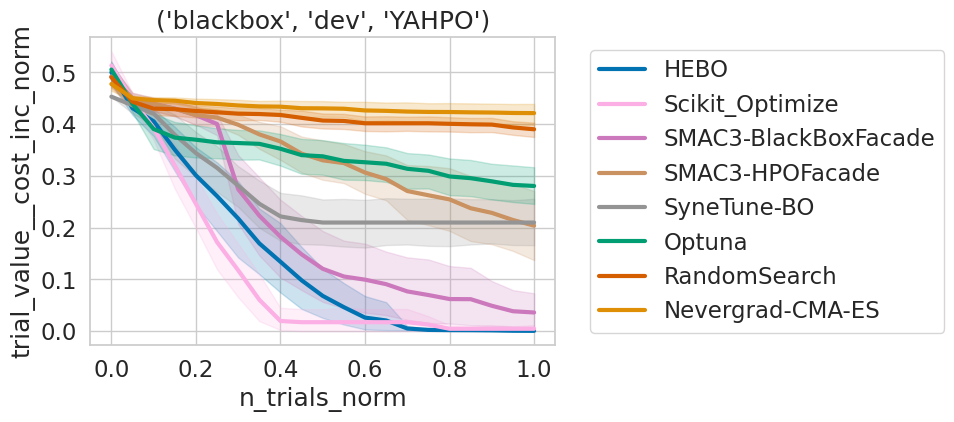

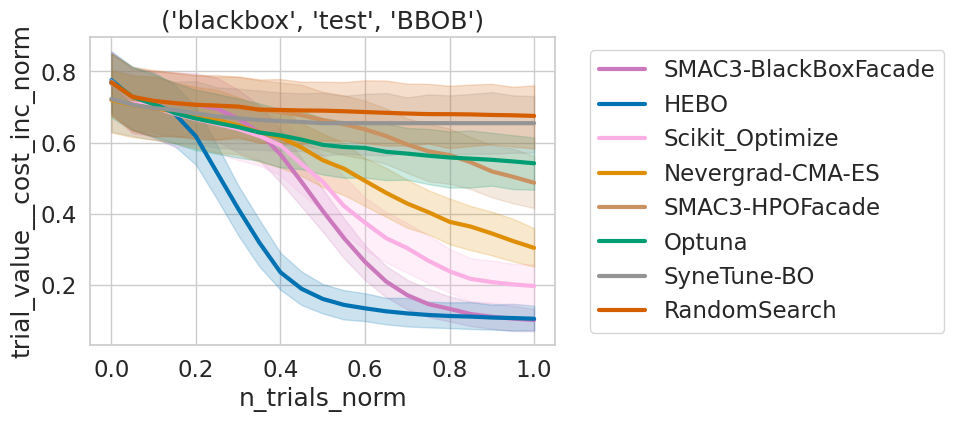

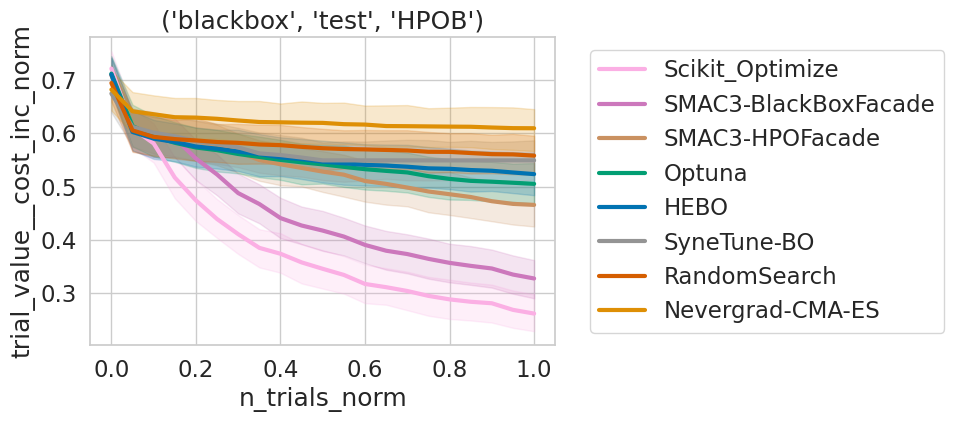

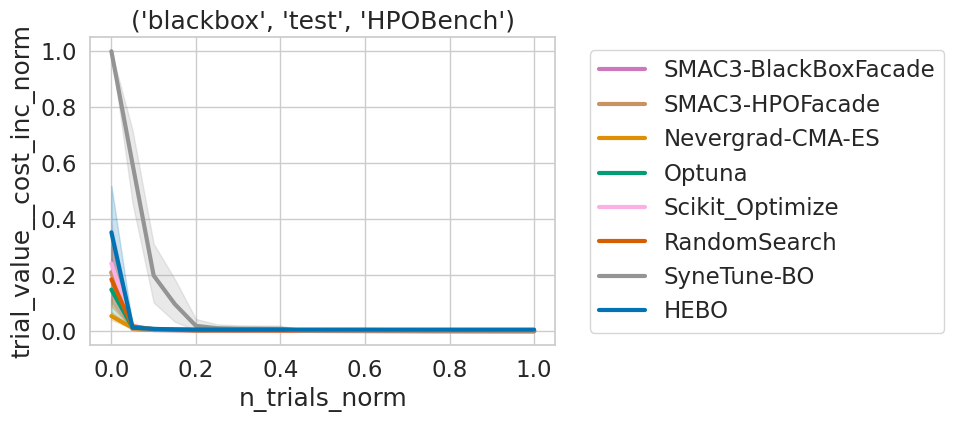

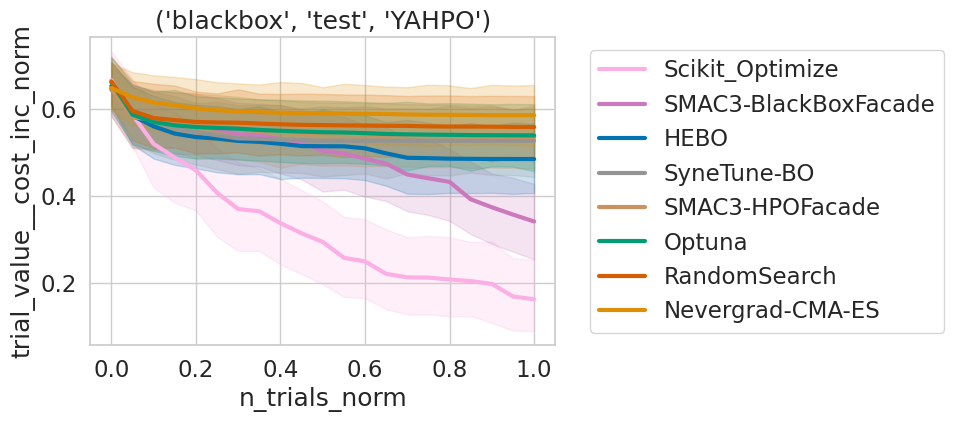

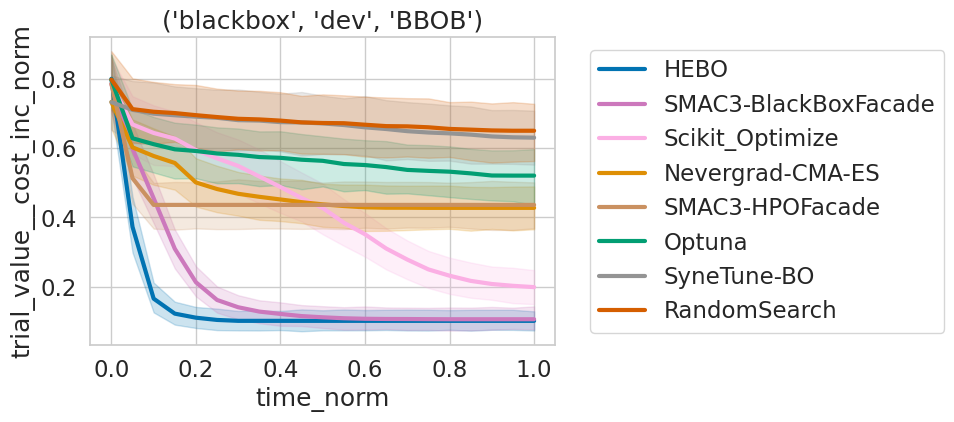

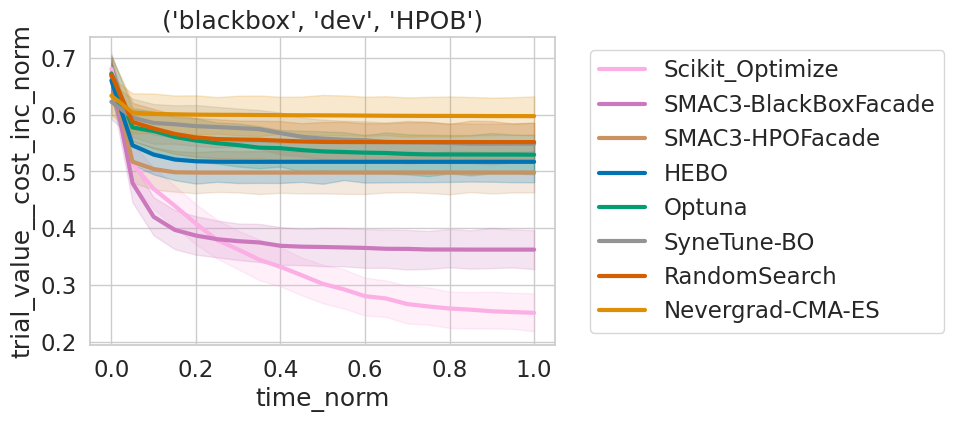

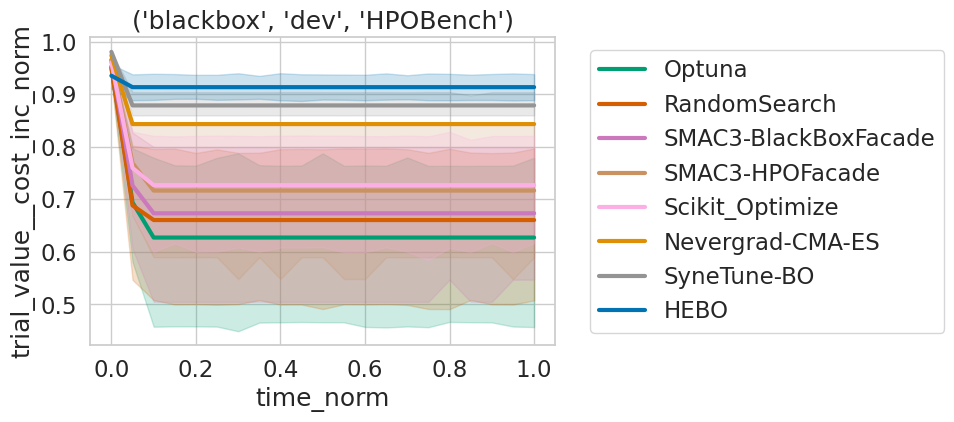

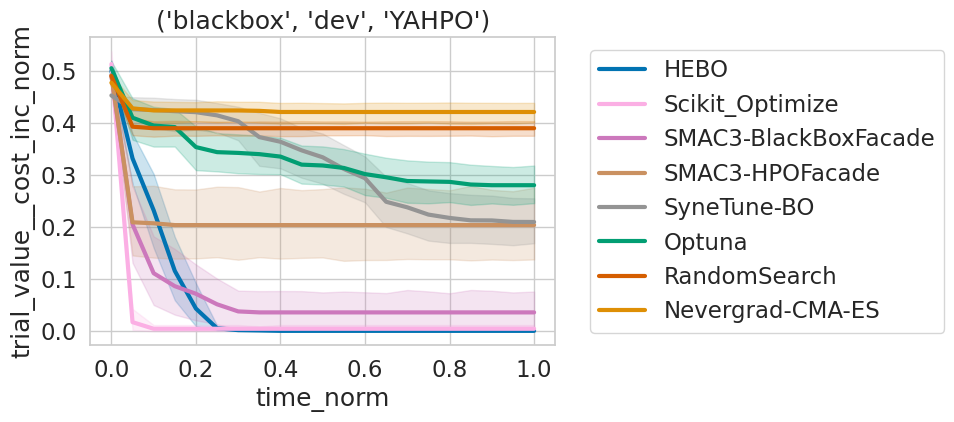

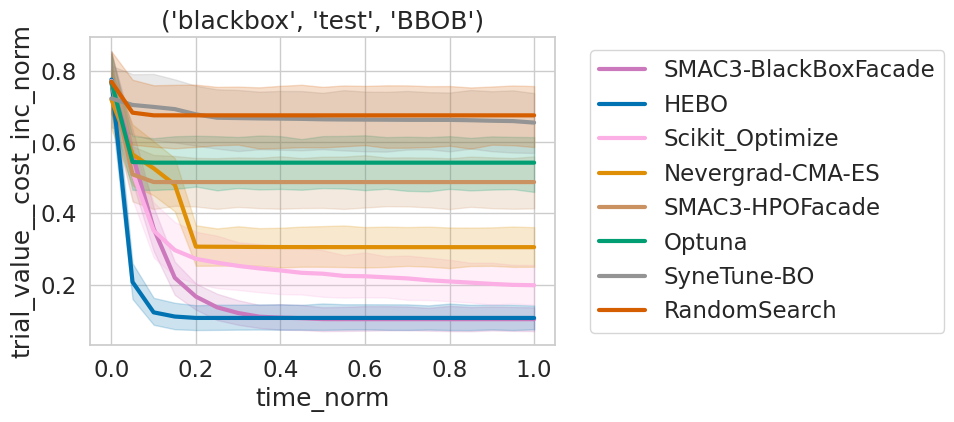

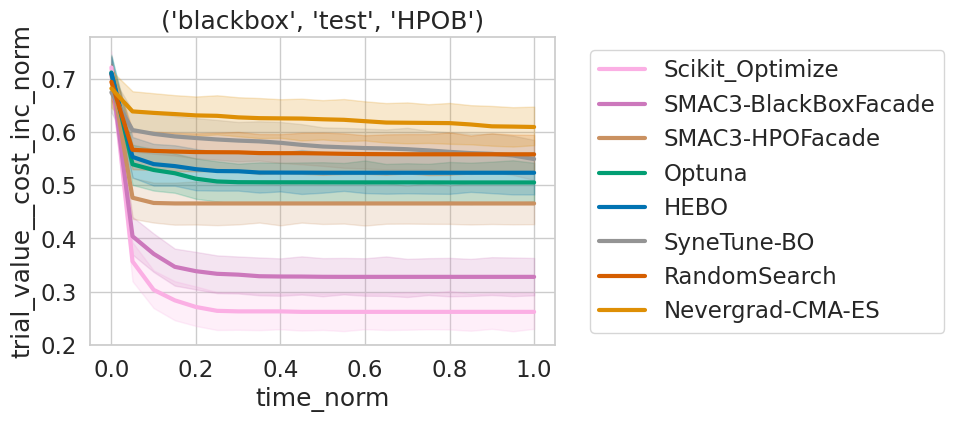

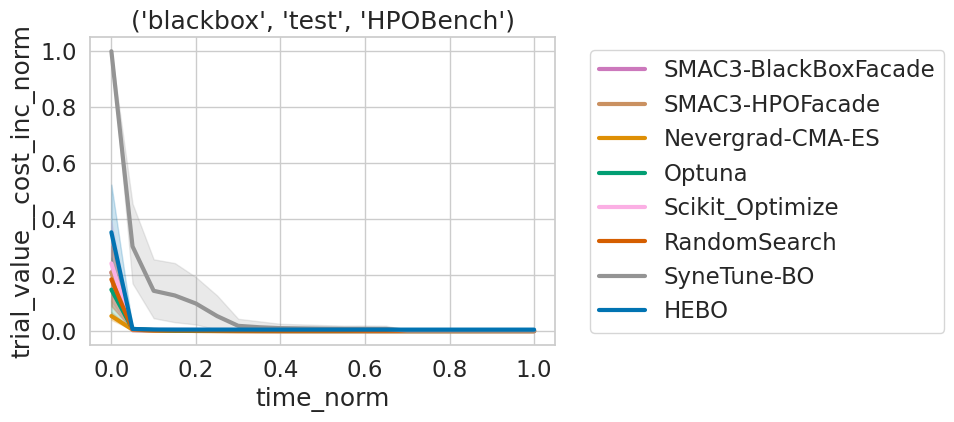

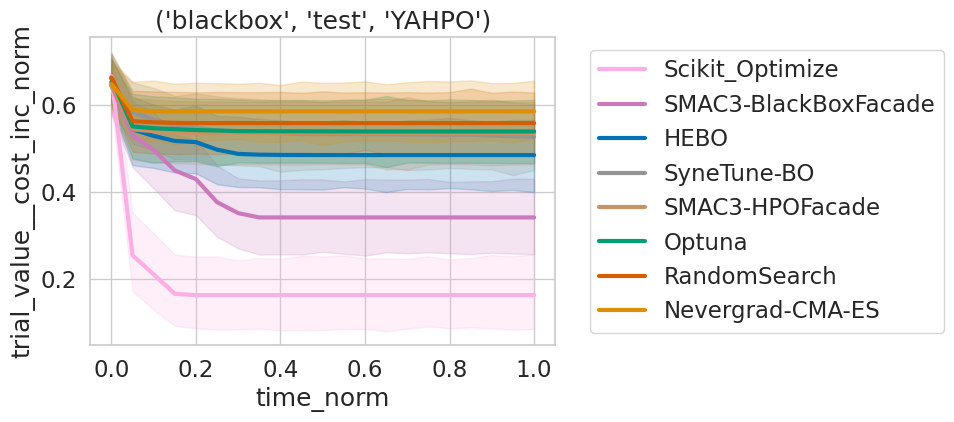

In [6]:
# Plot per benchmark
from carps.analysis.utils import get_color_palette, savefig
from carps.analysis.performance_over_time import plot_performance_over_time

palette = get_color_palette(perf)
lineplot_kwargs = dict(linewidth=3)

for gid, gdf in perf.groupby(by=["scenario", "set", "benchmark_id"]):
    # Iterations
    figure_filename = f"figures/perf_over_time/performance_over_time_trials_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

# Elapsed time
for gid, gdf in perf_time.groupby(by=["scenario", "set", "benchmark_id"]):    
    figure_filename = f"figures/perf_over_time/performance_over_time_elapsed_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="time_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

('blackbox', 'dev')


('blackbox', 'test')


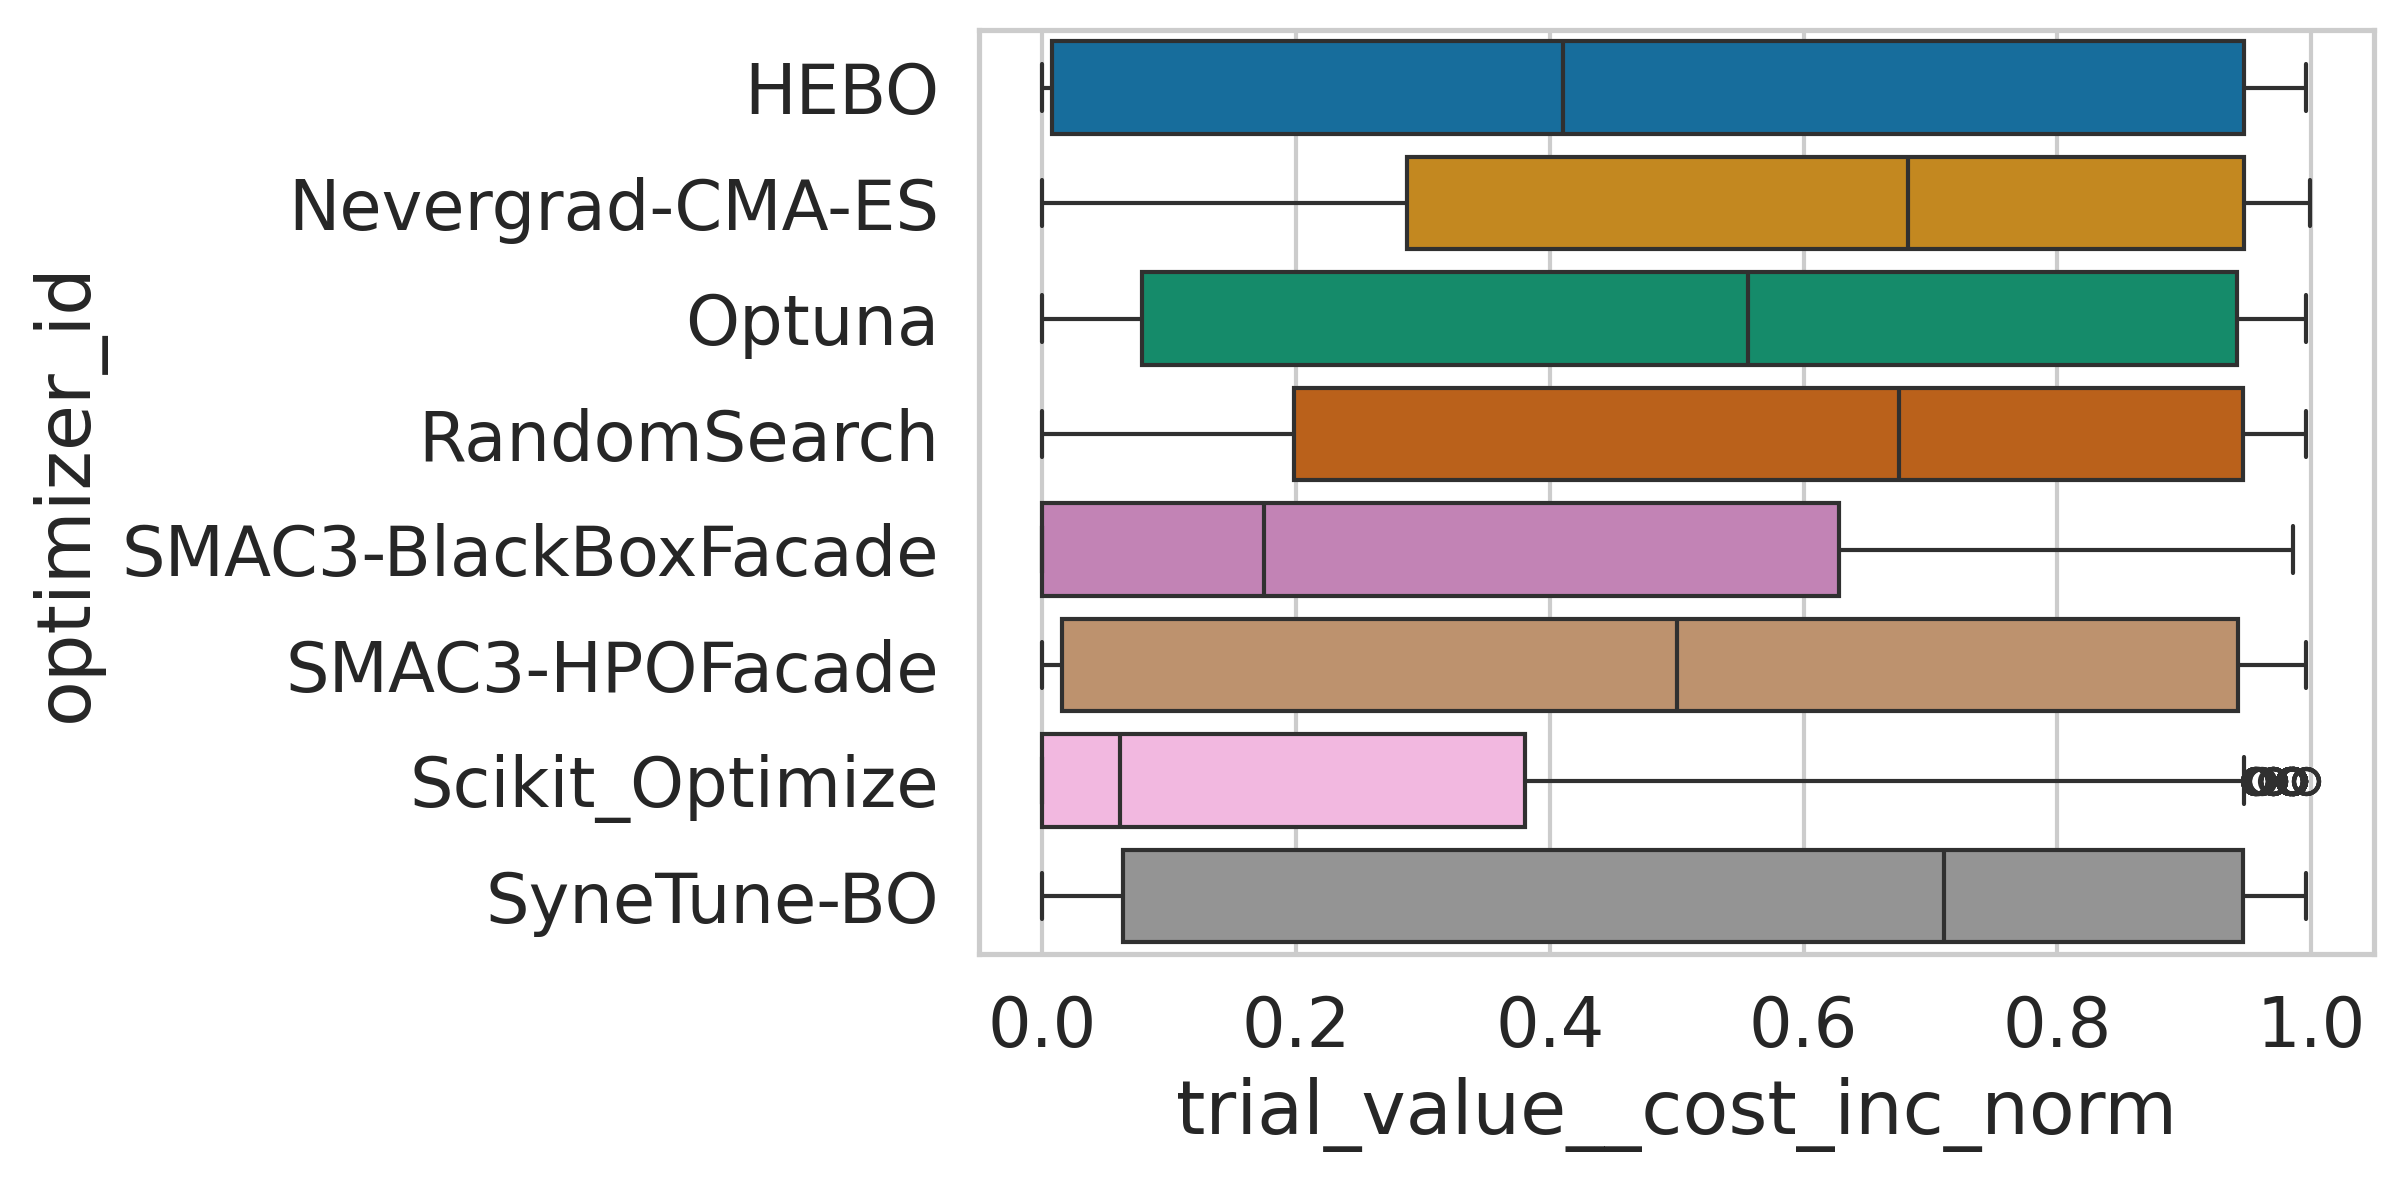

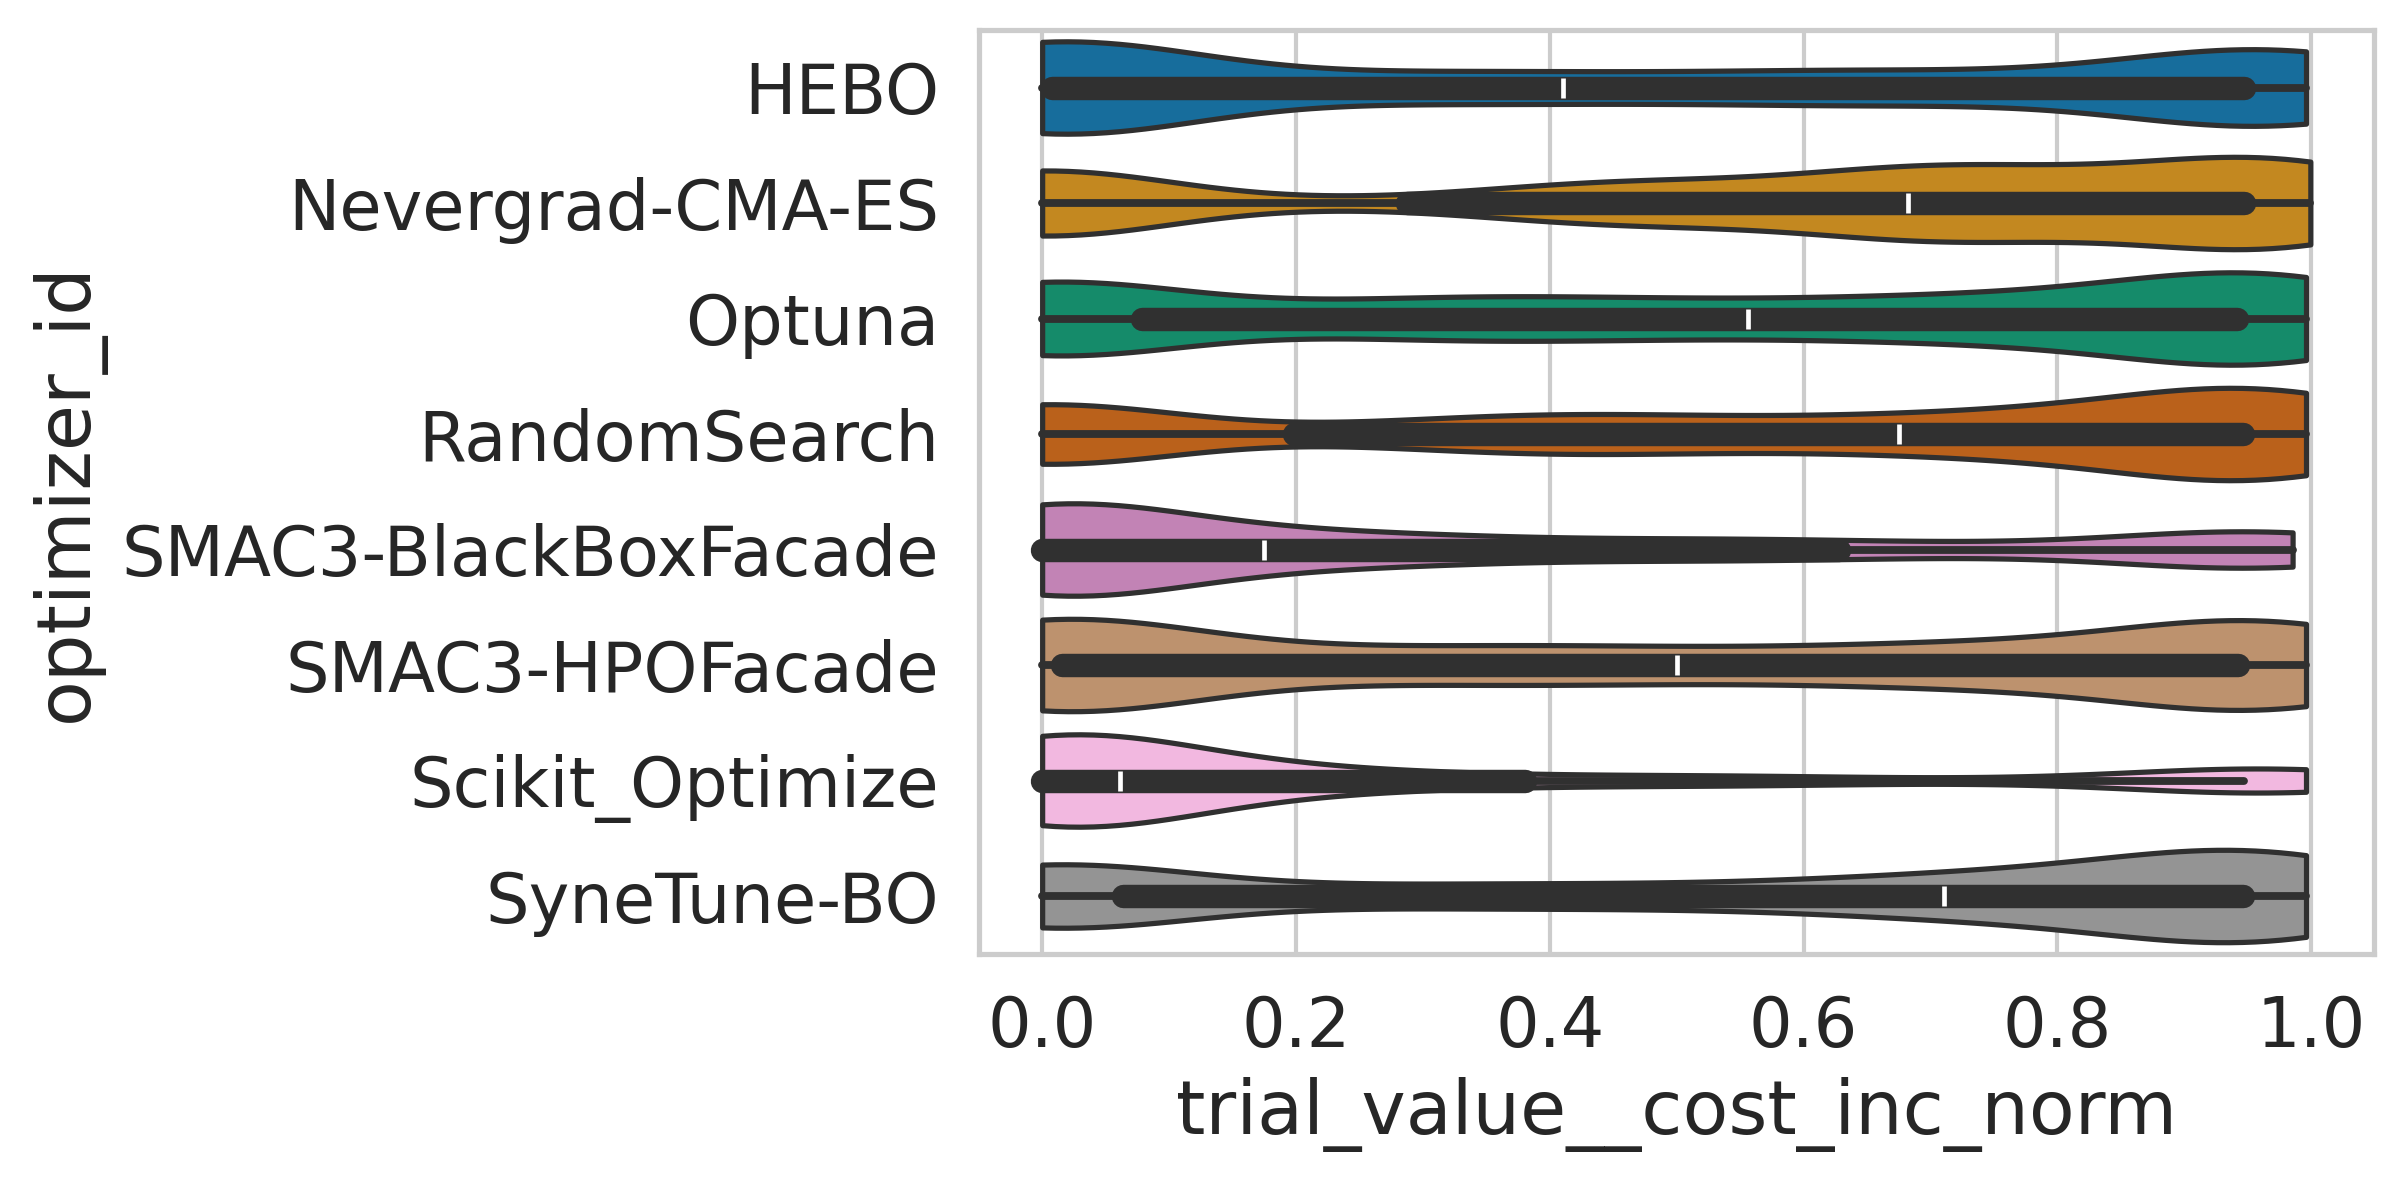

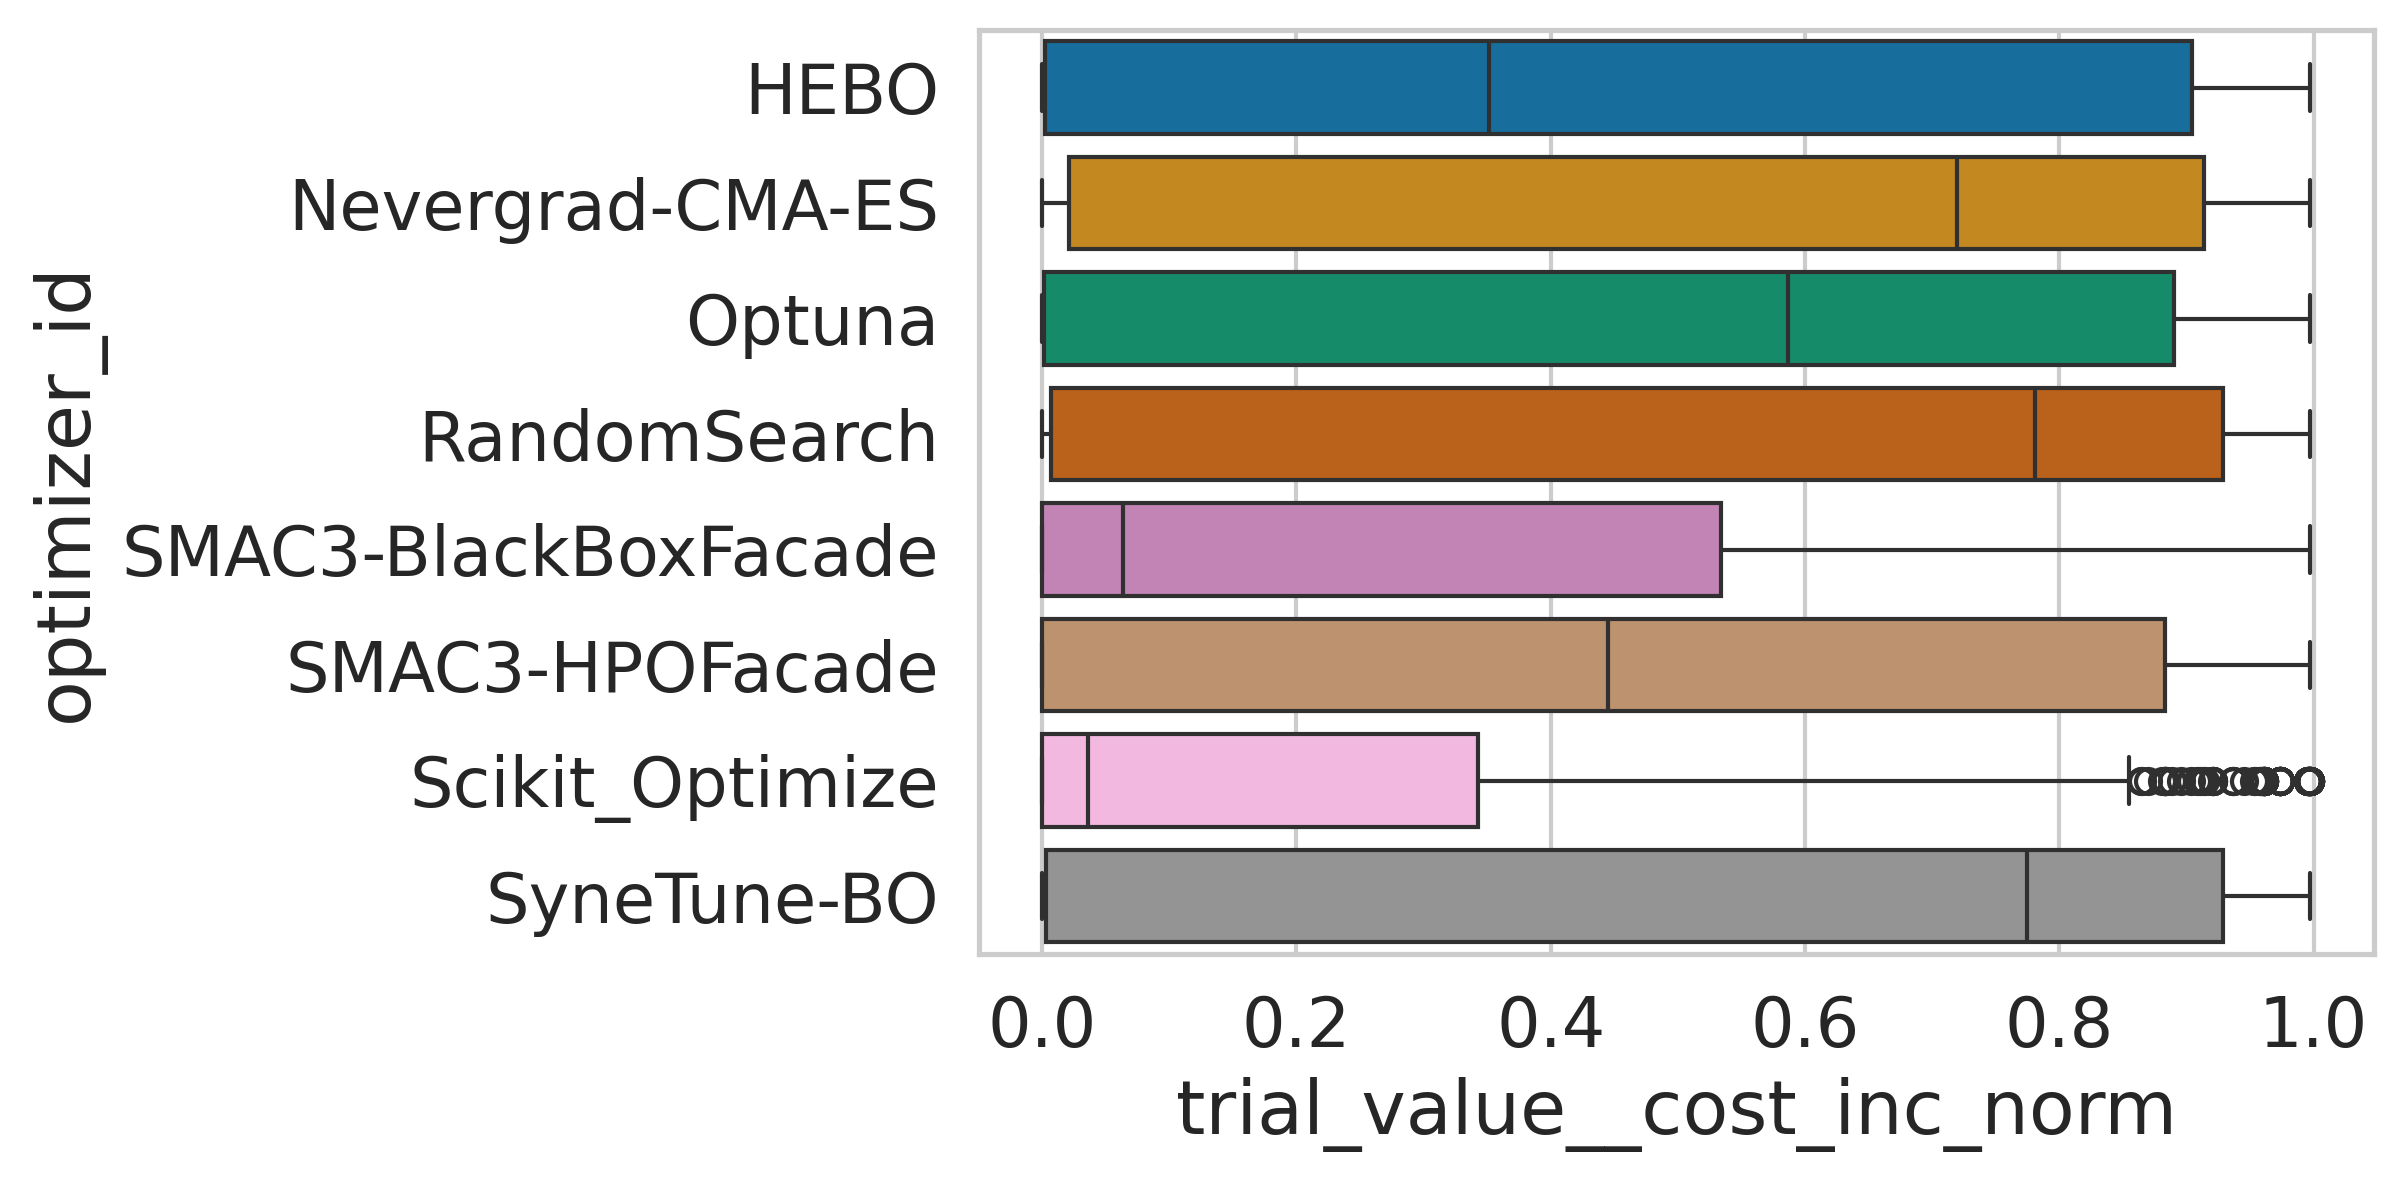

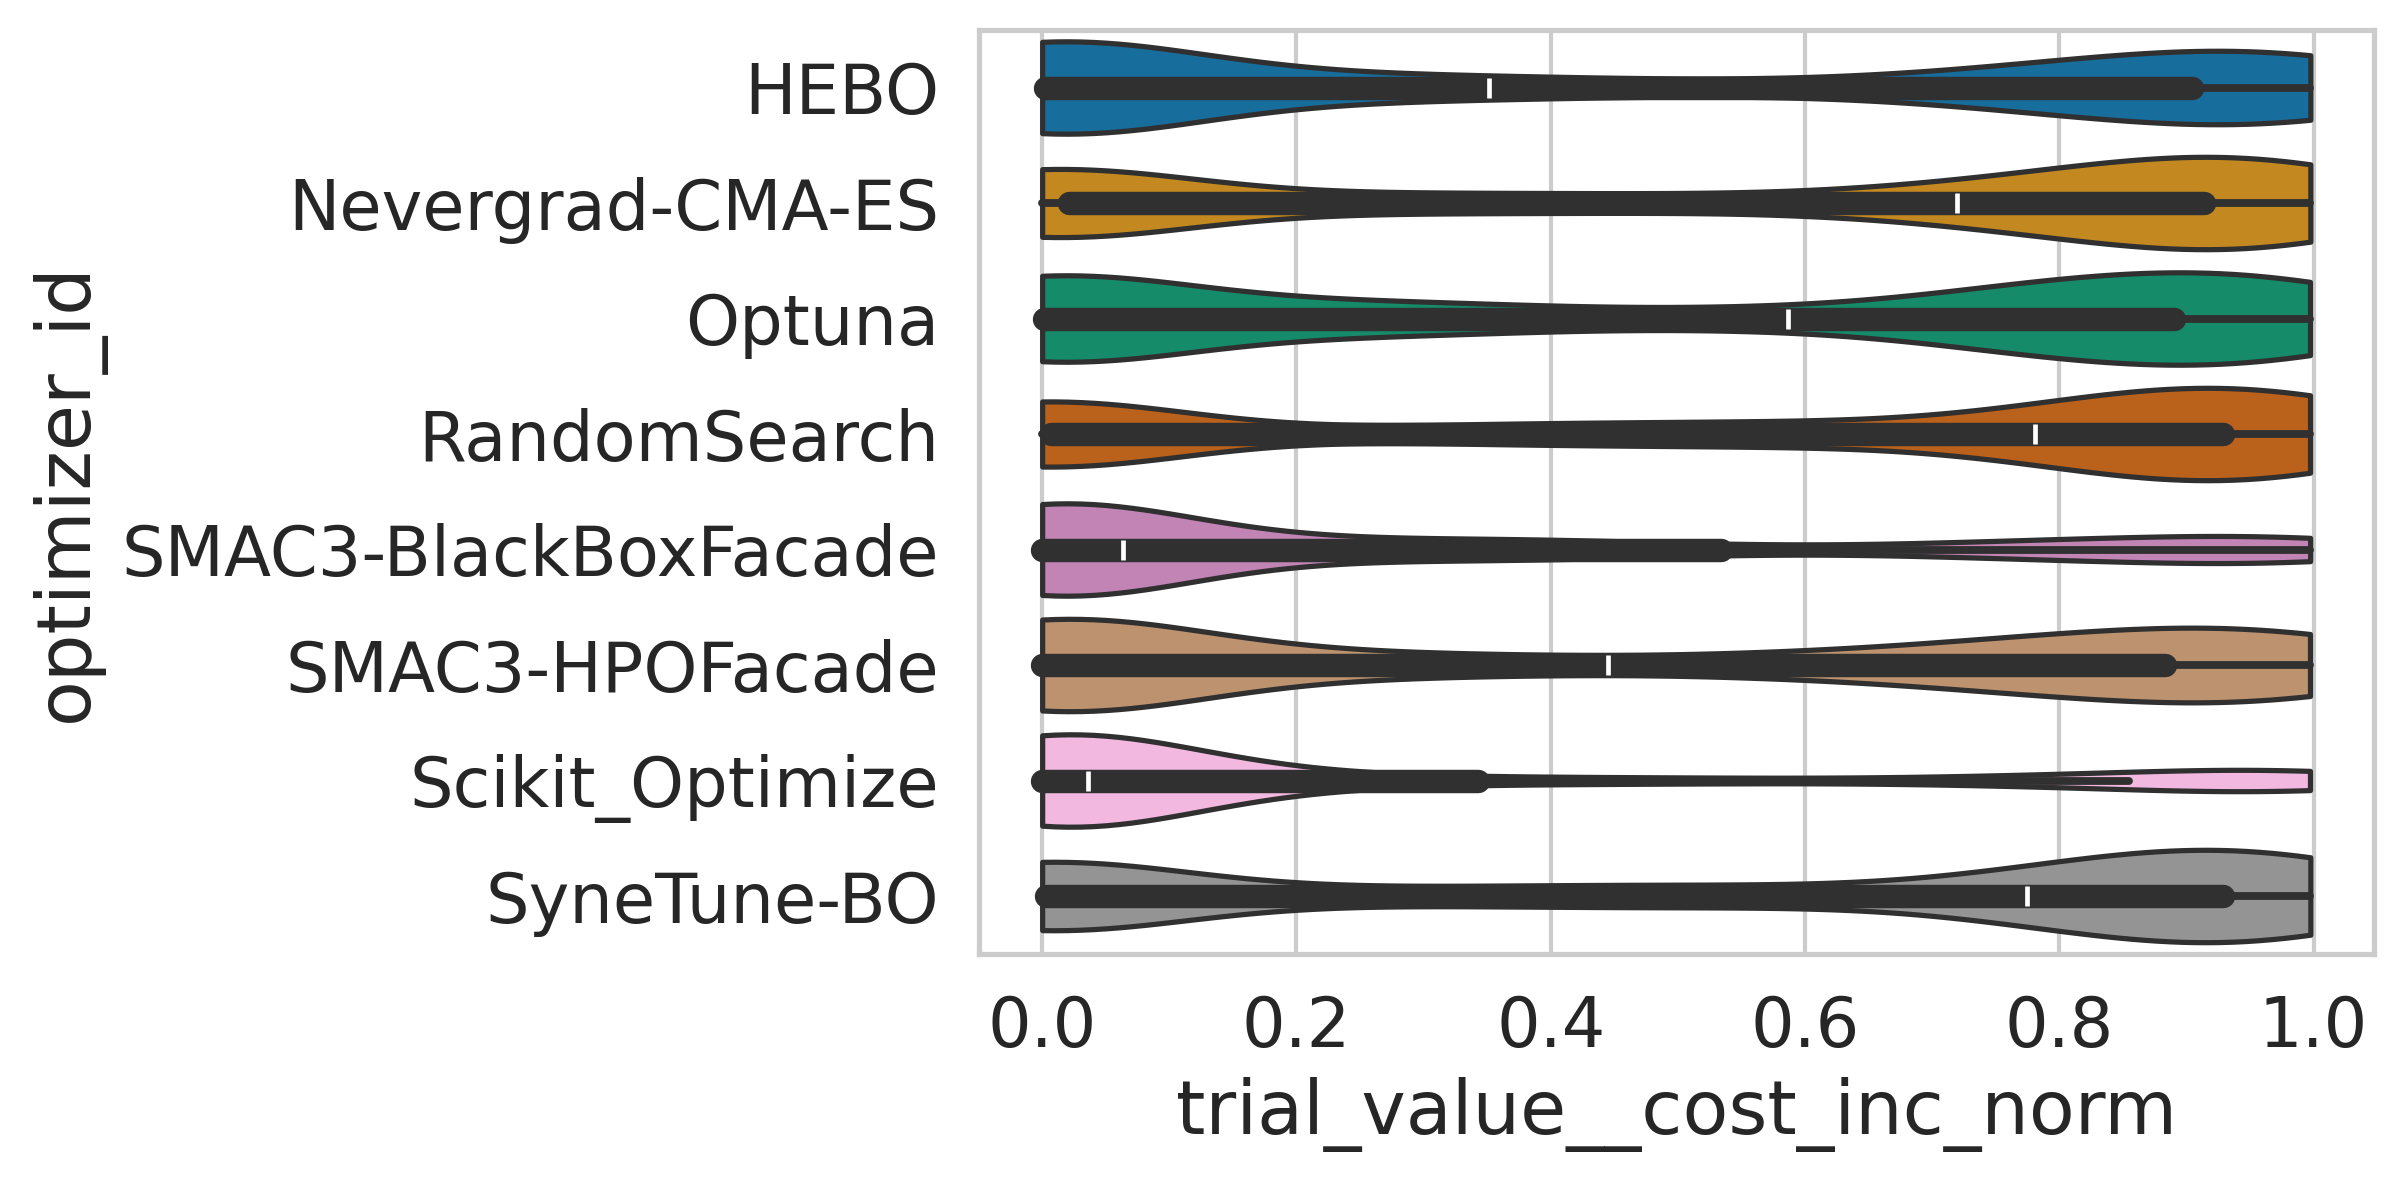

In [7]:
from carps.analysis.final_performance import plot_final_performance_boxplot, plot_final_performance_violinplot
from carps.analysis.utils import filter_only_final_performance

boxplot_kwargs = dict()

for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_final_performance_boxplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_boxplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)
    fig, ax = plot_final_performance_violinplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_violinplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)

In [8]:
max_val = df["n_trials_norm"].max()
error = df.groupby(by=["benchmark_id", "problem_id", "optimizer_id", "seed"])["n_trials_norm"].apply(lambda x: not np.isclose(x.max(), max_val))
error = error[error]
for i in error.index:
    print(i)

('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 1)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 2)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 3)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 4)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 5)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 6)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 7)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 8)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 9)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 10)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 11)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 12)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 13)
('BBOB', 'blackbox/30/dev/bbob/noiseless/16/21/0', 'SyneTune-BO', 14)
('BBOB', 'blackbox/30/dev/bbo